# Confidence Intervals

In [1]:
#Keep in mind with calculating p-values that 
#statistical significance != scientific significance
#Effect size is not shown with p-value 
#(with weight it could be stat. significant with 1 microgram changes or 1 kilogram)

In [2]:
dat <- read.csv('mice_pheno.csv')
chowPop <- dat[dat$Sex=='F' & dat$Diet=='chow', 3]

In [3]:
#Population mean
mu_chow = mean(chowPop)
mu_chow

[1] 23.89338

In [4]:
#Sample mean
N <- 30
chow <- sample(chowPop, N)
mean(chow)

[1] 23.871

In [13]:
se <- sd(chow)/sqrt(N)
se

[1] 0.5722833

In [18]:
#Construct a 95% interval, this means 95% of the time 
#mean of the pop. will fall between the values
mu_chow
Q <- qnorm(1-0.05/2)
interval <- c(mean(chow)-Q*se, mean(chow)+Q*se)
interval
interval[1] < mu_chow & interval[2] > mu_chow

[1] 23.89338

[1] 23.40735 25.65065

[1] TRUE

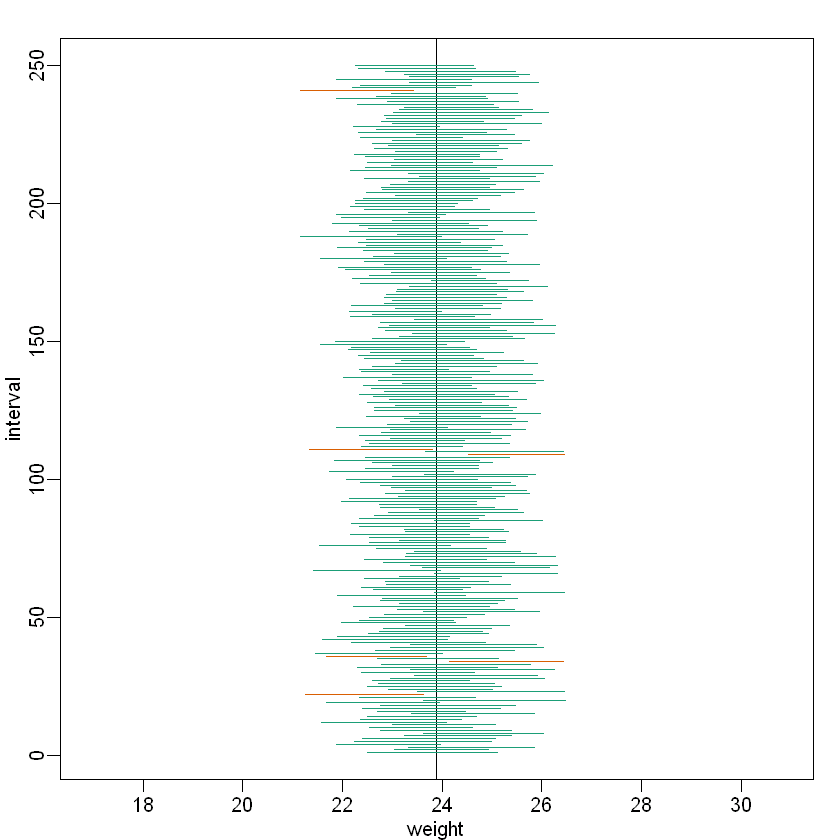

In [20]:
#Lets take numerous samples
#In about 5% of cases the mean of the population is not covered
library(rafalib)
B <- 250
mypar()
plot(mean(chowPop) + c(-7,7), c(1,1), type='n',
    xlab='weight',ylab='interval', ylim=c(1,B))
abline(v=mean(chowPop))
for (i in 1:B) {
    chow <- sample(chowPop, N)
    se <- sd(chow)/sqrt(N)
    interval <- c(mean(chow)-Q*se, mean(chow)+Q*se)
    covered <- mean(chowPop) <= interval[2] & mean(chowPop) >= interval[1]
    color <- ifelse(covered,1,2)
    lines(interval, c(i,i),col=color)
}

In [21]:
#Confidence intervals are preferable over p-values (which dont refer to effect size)

In [22]:
#Confidence intervals have info on estimated effect size AND uncertainty associated
#with estimates